<a href="https://colab.research.google.com/github/yunnsss/Fog_Forecast/blob/main/XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix, accuracy_score
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
# # CSV 파일을 데이터프레임으로 읽어오기
#train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2024날씨마루콘테스트/train_FE.csv')
#test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2024날씨마루콘테스트/test_FE.csv')

In [ ]:
train = train.fillna(0)
test = test.fillna(0)

In [ ]:
# 필요없는 열 제거
train = train.drop(labels=['sin_week', 'cos_week',
                                'sin_year', 'cos_year'
                                ], axis = 1)

test = test.drop(labels=['sin_week', 'cos_week',
                                'sin_year', 'cos_year'
                                ], axis = 1)

In [ ]:
# stn_id의 첫 번째 글자 추출
train['group'] = train['stn_id'].str[0]
test['group'] = test['stn_id'].str[0]

# 각 글자별로 데이터프레임 분리
stn_A = train[train['group'] == 'A']
stn_B = train[train['group'] == 'B']
stn_C = train[train['group'] == 'C']
stn_D = train[train['group'] == 'D']
stn_E = train[train['group'] == 'E']

# 테스트 데이터프레임 분리
test_stn_A = test[test['group'] == 'A']
test_stn_B = test[test['group'] == 'B']
test_stn_C = test[test['group'] == 'C']
test_stn_D = test[test['group'] == 'D']
test_stn_E = test[test['group'] == 'E']

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# XGB 모델 생성 함수
def get_xgb_model(stn_data, stn_name):
    X = stn_data.drop(labels=['year','month','day','time','minute','class', 'season', 'stn_id', 'group', 'datetime', 'vis1'], axis=1)
    y = stn_data['class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

    # SMOTE oversampling
    print("SMOTE 과샘플링 진행 중...")
    smote = SMOTE()
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    model = XGBClassifier(objective='multi:softprob', n_estimators=100, random_state=42)
    model.fit(X_train_resampled, y_train_resampled -1)

    y_pred = model.predict_proba(X_test)

    f1 = f1_score(y_test, y_pred, average='weighted')
    mae = mean_absolute_error(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{stn_name} XGB 모델의 MAE: {mae}")
    print(f"{stn_name} XGB 모델의 정확도: {accuracy}")
    print(f"{stn_name} XGB 모델의 F1 점수: {f1}")

    return model, f1, mae,accuracy

# 각 데이터프레임에 대한 XGB 모델 학습 및 평가
XGB_stn_A, f1_stn_A, mae_stn_A, acc_stn_A = get_xgb_model(stn_A, '_A_')
XGB_stn_B, f1_stn_B, mae_stn_B, acc_stn_B = get_xgb_model(stn_B, '_B_')
XGB_stn_C, f1_stn_C, mae_stn_C, acc_stn_C = get_xgb_model(stn_C, '_C_')
XGB_stn_D, f1_stn_D, mae_stn_D, acc_stn_D = get_xgb_model(stn_D, '_D_')
XGB_stn_E, f1_stn_E, mae_stn_E, acc_stn_E = get_xgb_model(stn_E, '_E_')

SMOTE 과샘플링 진행 중...
_A_ XGB 모델의 MAE: 0.035503810262520294
_A_ XGB 모델의 정확도: 0.9750153929808008
_A_ XGB 모델의 F1 점수: 0.9836570574109901
SMOTE 과샘플링 진행 중...
_B_ XGB 모델의 MAE: 0.09632731702268257
_B_ XGB 모델의 정확도: 0.9406940917016313
_B_ XGB 모델의 F1 점수: 0.9565593679745086
SMOTE 과샘플링 진행 중...
_C_ XGB 모델의 MAE: 0.043455472435317104
_C_ XGB 모델의 정확도: 0.9754451168183479
_C_ XGB 모델의 F1 점수: 0.9838818763932061
SMOTE 과샘플링 진행 중...
_D_ XGB 모델의 MAE: 0.08257798204178901
_D_ XGB 모델의 정확도: 0.9518809311034512
_D_ XGB 모델의 F1 점수: 0.9661966989554713
SMOTE 과샘플링 진행 중...
_E_ XGB 모델의 MAE: 0.03279994899910749
_E_ XGB 모델의 정확도: 0.9780483658464023
_E_ XGB 모델의 F1 점수: 0.9854102612616855


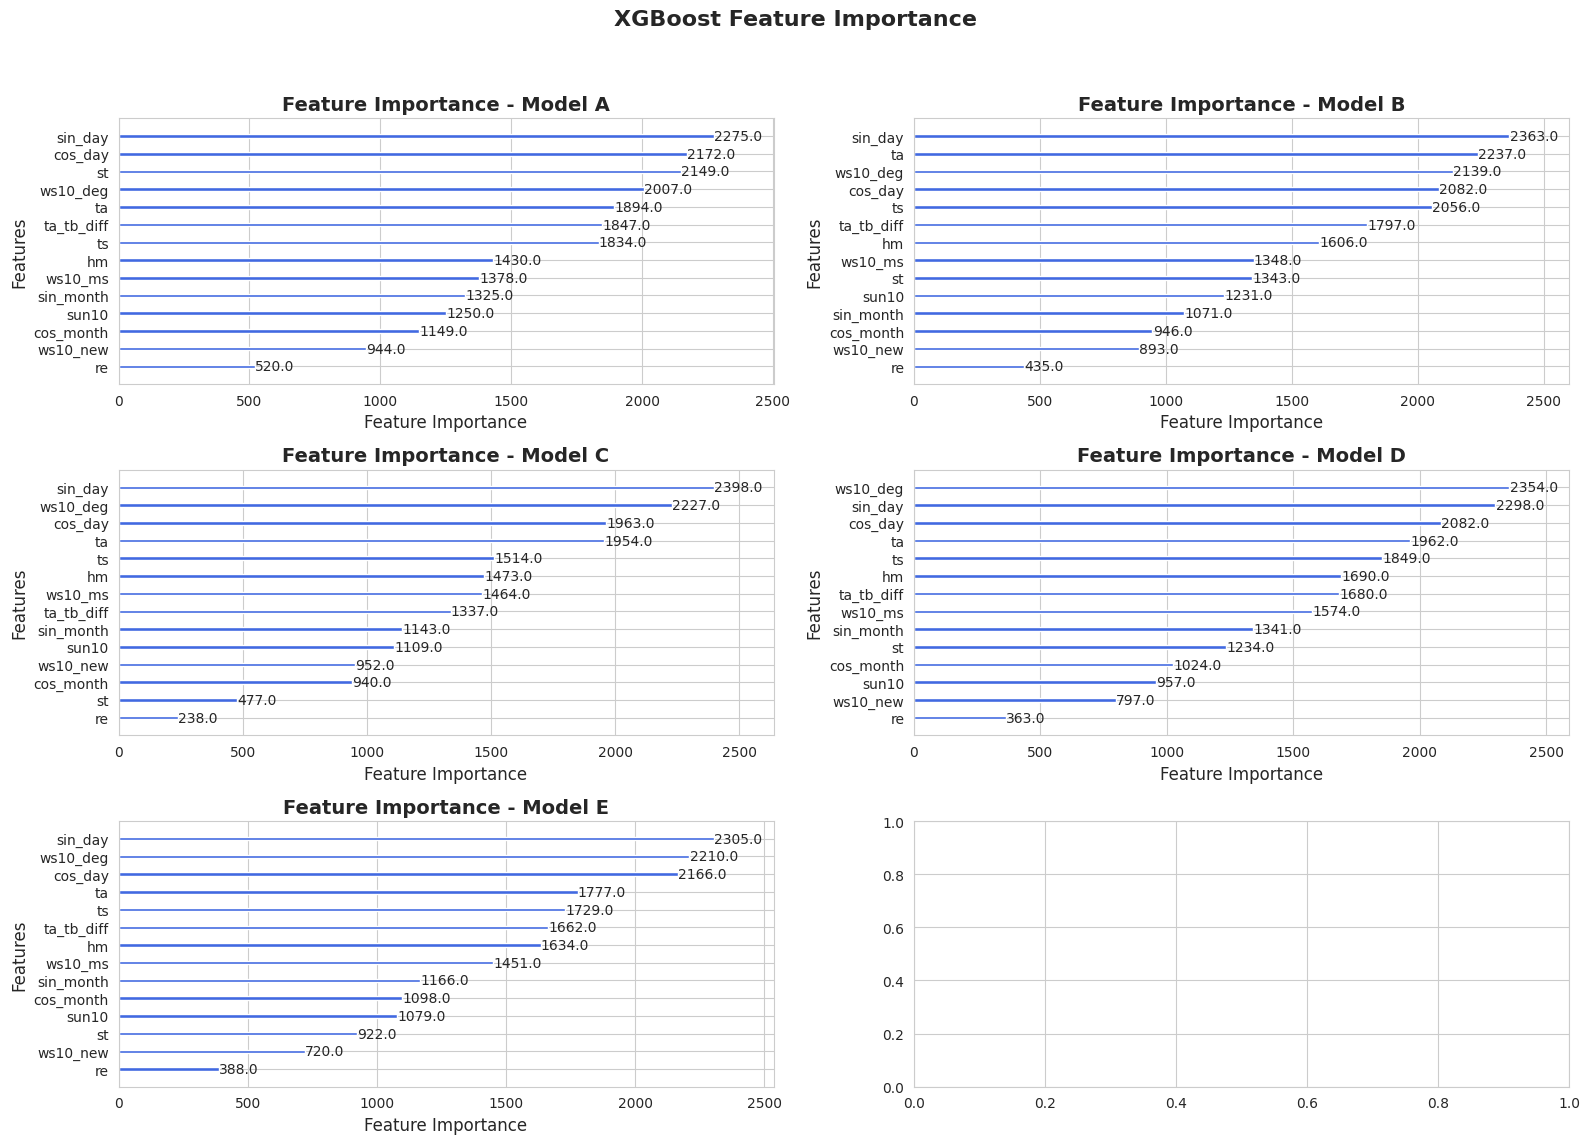

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일 변경
sns.set_style("whitegrid")

# 각 모델의 feature importance 확인
models = [XGB_stn_A, XGB_stn_B, XGB_stn_C, XGB_stn_D, XGB_stn_E]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
axes = axes.flatten()

model_labels = ['Model A', 'Model B', 'Model C', 'Model D', 'Model E']

for i, model in enumerate(models):
    plot_importance(model, ax=axes[i], color='#4169E1')  # 파란색 바 사용
    axes[i].set_title(f'Feature Importance - {model_labels[i]}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Feature Importance', fontsize=12)
    axes[i].set_ylabel('Features', fontsize=12)

plt.suptitle('XGBoost Feature Importance', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 상단 여백 조정
plt.show()

In [ ]:
# 결과 데이터 생성
results = {
    'Station': ['A', 'B', 'C', 'D', 'E'],
    'MAE': [mae_stn_A, mae_stn_B, mae_stn_C, mae_stn_D, mae_stn_E],
    # 'Accuracy': [f1_stn_A, f1_stn_B, f1_stn_C, f1_stn_D, f1_stn_E],
    'F1-score': [f1_stn_A, f1_stn_B, f1_stn_C, f1_stn_D, f1_stn_E]
}

result_df = pd.DataFrame(results)

# 데이터프레임 출력
print(result_df)

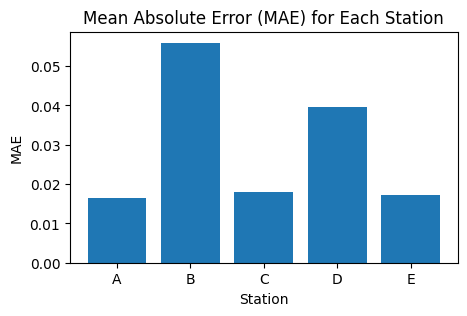

In [ ]:
# MAE 시각화
plt.figure(figsize=(5, 3))
stations = ['A', 'B', 'C', 'D', 'E']
mae_values = [mae_stn_A, mae_stn_B, mae_stn_C, mae_stn_D, mae_stn_E]

plt.bar(stations, mae_values)
plt.xlabel('Station')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE) for Each Station')
plt.show()

In [ ]:
# F1-score 시각화 (레이더 차트)
plt.figure(figsize=(8, 8))
f1_scores = [f1_stn_A, f1_stn_B, f1_stn_C, f1_stn_D, f1_stn_E]

# 레이더 차트 그리기
radar_data = pd.DataFrame({'Station': stations, 'F1-score': f1_scores})
radar_data = radar_data.set_index('Station')

ax = plt.subplot(projection='polar')
ax.plot(np.linspace(0, 2 * np.pi, len(f1_scores)), f1_scores, linewidth=2)
ax.fill(np.linspace(0, 2 * np.pi, len(f1_scores)), f1_scores, alpha=0.5)
ax.set_thetagrids(np.degrees(np.linspace(0, 2 * np.pi, len(f1_scores))), labels=stations)
ax.set_title('F1-score for Each Station')
plt.show()

In [ ]:
# 예측 함수
def predict_and_fill(stn_test, model):
    X = stn_test.drop(labels=['year','month','day','time','minute','class', 'season', 'stn_id', 'group', 'datetime'], axis=1)
    y_pred = model.predict(X)

    # Assigning predicted classes back to season_df
    stn_test['class'] = y_pred

    return stn_test

pred_stn_A = predict_and_fill(test_stn_A, XGB_stn_A)
pred_stn_B = predict_and_fill(test_stn_B, XGB_stn_B)
pred_stn_C = predict_and_fill(test_stn_C, XGB_stn_C)
pred_stn_D = predict_and_fill(test_stn_D, XGB_stn_D)
pred_stn_E = predict_and_fill(test_stn_E, XGB_stn_E)

<ipython-input-26-74e9fff73157>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stn_test['class'] = y_pred
<ipython-input-26-74e9fff73157>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stn_test['class'] = y_pred
<ipython-input-26-74e9fff73157>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [ ]:
# 계절별 데이터프레임 합치기
result_stn = pd.concat([pred_stn_A, pred_stn_B, pred_stn_C, pred_stn_D, pred_stn_E])